# Visualizing the Data

In this code I visualize the data on factors and corresponding change in returns.

Importing necessary libraries.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Although it is not advisable but to keep this notebook clean and short, supress warnings 

Comment this when you want to see warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

Importing data.

In [3]:
Data=pd.read_csv(r'Input_data_market_risk_model.csv')

First few rows...

In [4]:
Data.head()

,Under Constr % of Inventory,Date,Market Occupancy,Total Employed,Unemployment Rate,Housing Demand Quotient,state,msa code,Change In Return,Population Estimate,Market
0,0.077813,2018-10-01,0.941469,1736200.0,3.8,44.477334,WA,42644,-0.207388,3939363.0,Seattle
1,0.075314,2018-07-01,0.944947,1724400.0,4.0,40.722087,WA,42644,0.340640,3939363.0,Seattle
2,0.077475,2018-04-01,0.945757,1716400.0,3.7,42.028420,WA,42644,0.628392,3939363.0,Seattle
3,0.074218,2018-01-01,0.943161,1710900.0,4.6,50.819533,WA,42644,-1.976761,3939363.0,Seattle
4,0.073655,2017-10-01,0.940336,1694600.0,4.0,43.767138,WA,42644,-0.485984,3925639.5,Seattle


The different factors and change in return.

In [5]:
Factors=list(Data.columns.drop(['Date','msa code','state','Market']))
Factors

['Under Constr % of Inventory',
 'Market Occupancy',
 'Total Employed',
 'Unemployment Rate',
 'Housing Demand Quotient',
 'Change In Return',
 'Population Estimate']

Data count across the different markets. 

In [6]:
Market_datacount=pd.DataFrame(Data.Market.value_counts())

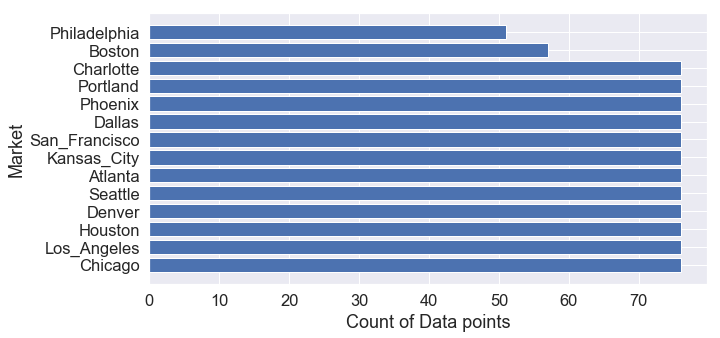

In [7]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)  # crazy big
plt.barh(Market_datacount.index,Market_datacount.Market)
plt.xlabel('Count of Data points')
plt.ylabel('Market')
plt.show()

## Functions

### Scatter plot function

In [8]:
def scatter_plot(Data): 
    Features=Data.columns.drop('Change In Return')
    count=1
    plt.figure(figsize=(15,15))
    sns.set(font_scale=1)  # crazy big
    for feature in Features:
        plt.subplot(3,2,count)
        plt.scatter(Data[feature],Data['Change In Return'])
        plt.ylabel('Change In Return')
        plt.xlabel(feature)
        count=count+1

### Time Series plot function

In [9]:
def time_series_plot(Data): 
    Features=Data.columns.drop('Change In Return')
    count=1
    plt.figure(figsize=(15,15))
    sns.set(font_scale=1)  # crazy big
    for feature in Features:
        plt.subplot(3,2,count)
        plt.plot(Data[feature],'.r')
        plt.plot(Data[feature],'k')
        plt.xlabel('Time')
        plt.ylabel(feature)
        #plt.xticks(ticks=np.arange(0,270,50))
        count=count+1
    plt.suptitle('DIffeTime series plots Market')

## All Markets Data

In [10]:
Data.reset_index(drop=True,inplace=True)

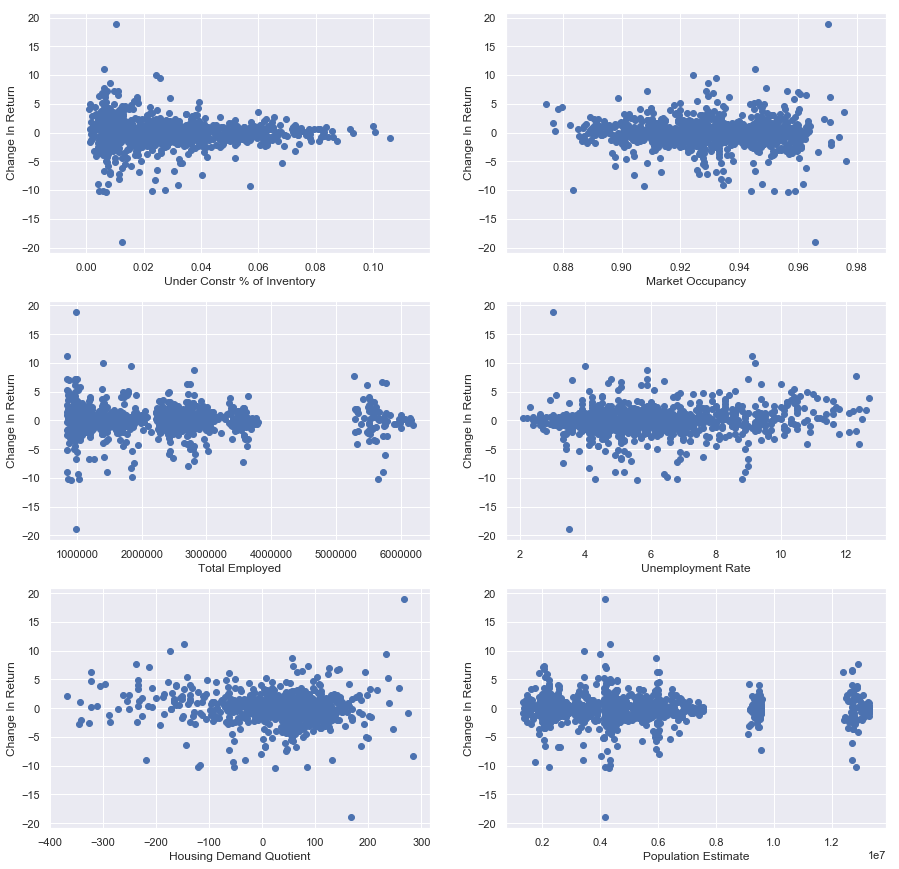

In [11]:
scatter_plot(Data[Factors])

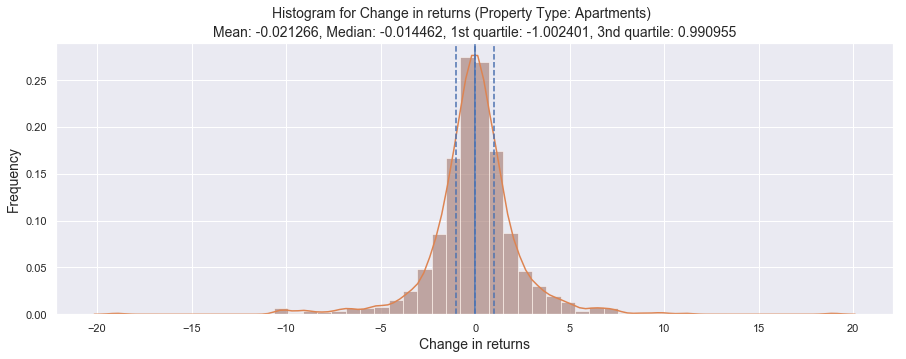

In [12]:
plot_data=Data['Change In Return']
plt.figure(figsize=(15,5))
sns.distplot(plot_data,kde=False,norm_hist=True)
sns.distplot(plot_data,kde=True,norm_hist=True)
plt.axvline(plot_data.mean(),linestyle='solid')
plt.axvline(plot_data.median(),linestyle='dashed')
plt.axvline(plot_data.quantile(q=0.25),linestyle='dashed')
plt.axvline(plot_data.quantile(q=0.75),linestyle='dashed')
#plt.hist(ApartmentData['Change In Return'],bins=50)
plt.xlabel('Change in returns',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.suptitle('Histogram for Change in returns (Property Type: Apartments)',fontsize=14)
plt.title('Mean: %f, Median: %f, 1st quartile: %f, 3nd quartile: %f'%(plot_data.mean(),plot_data.median(),
                                                                     plot_data.quantile(q=0.25),plot_data.quantile(q=0.75)),fontsize=14)
plt.show()

## Property Type: Apartment, Market: Seattle

In [13]:
Market_Data=Data[Data.Market=='Seattle']
Market_Data.reset_index(drop=True,inplace=True)

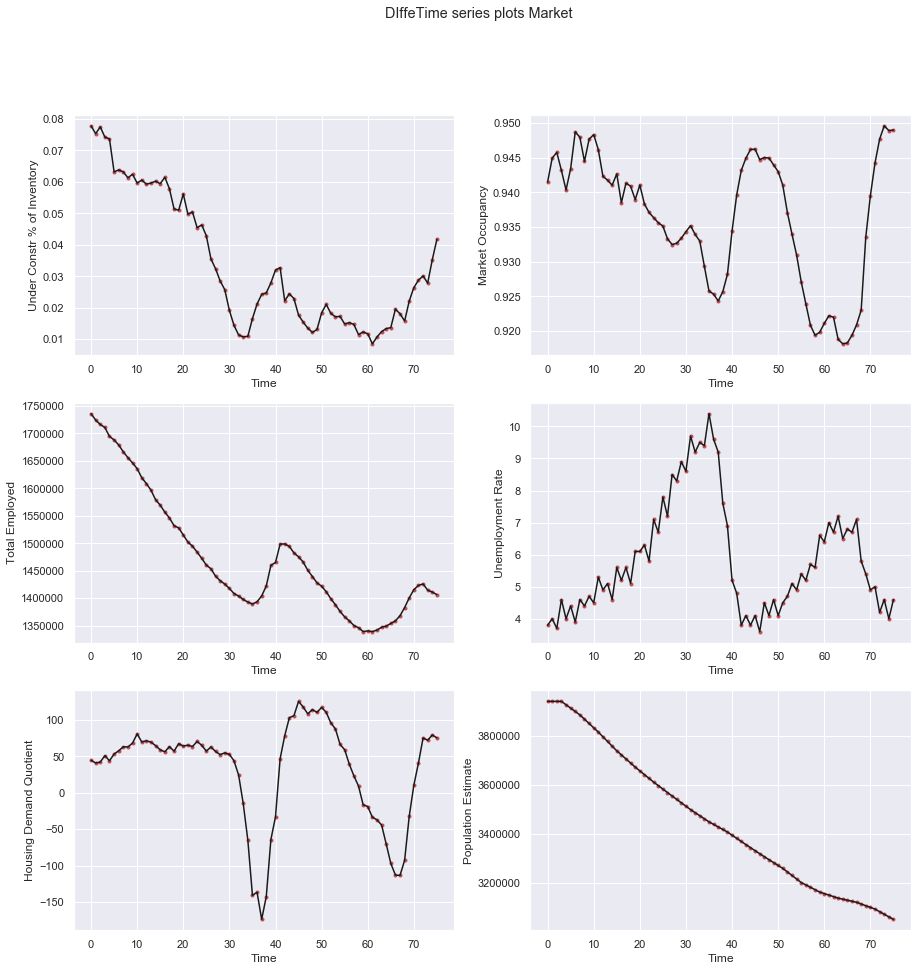

In [14]:
time_series_plot(Market_Data[Factors])

Text(0.5, 0, 'Quarters')

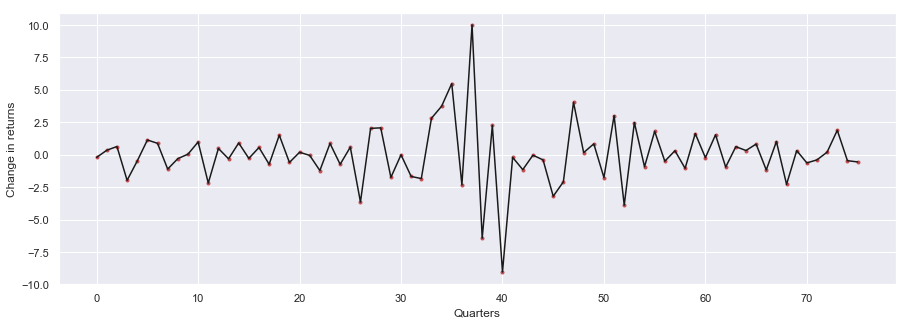

In [15]:
plt.figure(figsize=(15,5))
plt.plot(Market_Data['Change In Return'],'.r')
plt.plot(Market_Data['Change In Return'],'k')
plt.ylabel('Change in returns',fontsize=12)
plt.xlabel('Quarters',fontsize=12)

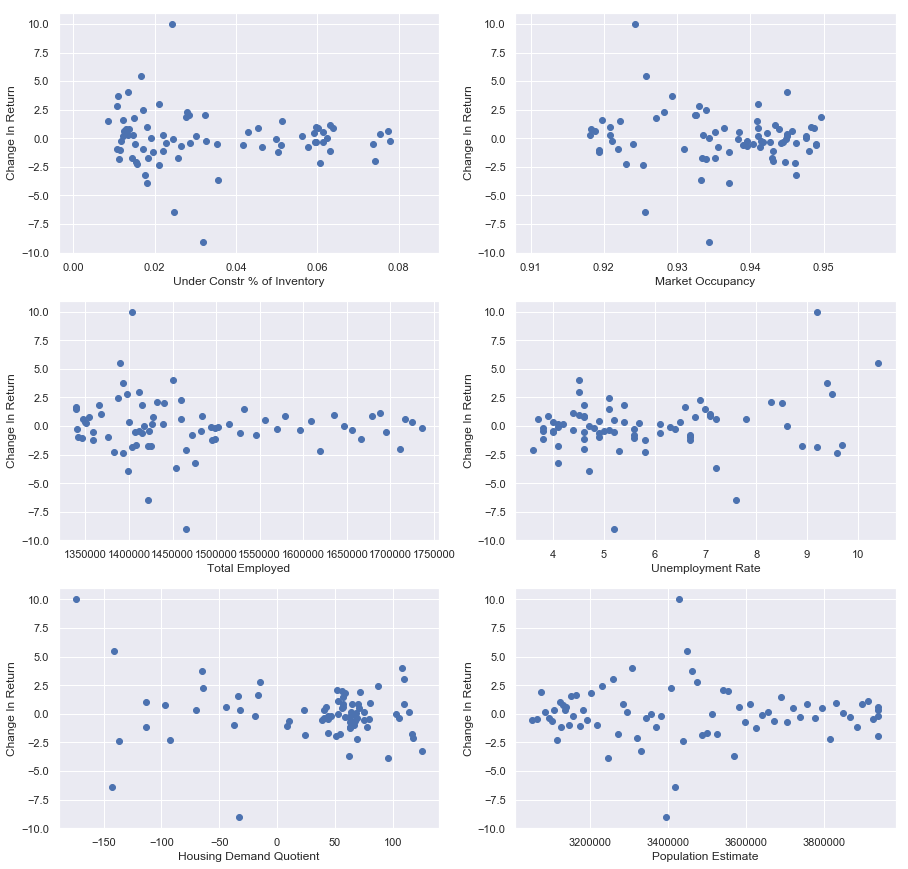

In [16]:
scatter_plot(Market_Data[Factors])

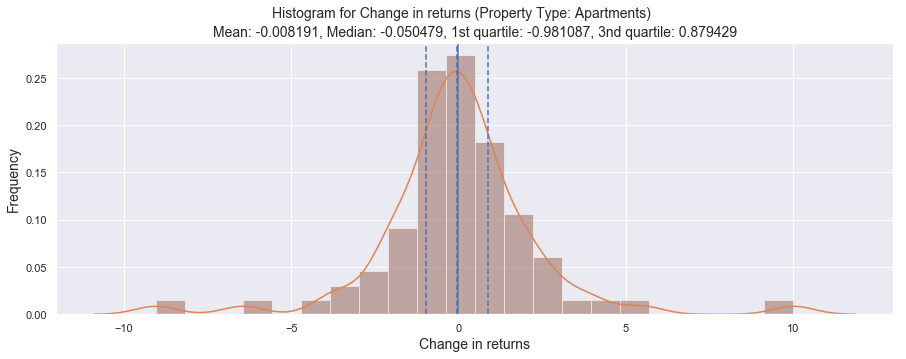

In [17]:
plot_data=Market_Data['Change In Return']
plt.figure(figsize=(15,5))
sns.distplot(plot_data,kde=False,norm_hist=True)
sns.distplot(plot_data,kde=True,norm_hist=True)
plt.axvline(plot_data.mean(),linestyle='solid')
plt.axvline(plot_data.median(),linestyle='dashed')
plt.axvline(plot_data.quantile(q=0.25),linestyle='dashed')
plt.axvline(plot_data.quantile(q=0.75),linestyle='dashed')
#plt.hist(ApartmentData['Change In Return'],bins=50)
plt.xlabel('Change in returns',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.suptitle('Histogram for Change in returns (Property Type: Apartments)',fontsize=14)
plt.title('Mean: %f, Median: %f, 1st quartile: %f, 3nd quartile: %f'%(plot_data.mean(),plot_data.median(),
                                                                     plot_data.quantile(q=0.25),plot_data.quantile(q=0.75)),fontsize=14)
plt.show()

Done. Please proceed to Model training